Notebook for analyzing the stability of steady states to biomass perturbations. Includes code for generating Figure 2 (a) 
and Table 1 from the main text, and Figures 1 (a), 2, 3, and 4 from the SI.


In [1]:
import numpy as np
import scipy.sparse as sparse
import scipy.io as sio
import pickle


In [2]:
# Load data for model.
directory = '../ModelFiles/FourSpecies'

# S contains the stoichiometry matrices R_{k} and R_{k}^{ex} for each species k.
S = sio.loadmat(directory + '/S.mat')['S']
I = sio.loadmat(directory + '/I.mat')['I'][0][0]
J = sio.loadmat(directory + '/J.mat')['J'][0][0]
reaction_lb = sio.loadmat(directory + '/lb.mat')['lb']
reaction_ub = sio.loadmat(directory + '/ub.mat')['ub']

# Indices of reactions and metabolites for each species, needed because 
# cobra groups all metabolites and reactions into a single model.
lumen_reactions_idx = sio.loadmat(directory + '/lumen_reactions_idx.mat')['lumen_reactions_idx'] - 1
lumen_metabolites_idx = sio.loadmat(directory + '/lumen_metabolites_idx.mat')['lumen_metabolites_idx'] - 1
lumen_reaction_names = sio.loadmat(directory + '/lumen_reactions.mat')['lumen_reactions']

Ec1_reactions_idx = sio.loadmat(directory + '/Ec1_reactions_idx.mat')['Ec1_reactions_idx'] - 1
Ec1_reaction_names = sio.loadmat(directory + '/Ec1_reactions.mat')['Ec1_reactions']
Ec1_metabolites_idx = sio.loadmat(directory + '/Ec1_metabolites_idx.mat')['Ec1_metabolites_idx'] - 1
Ec1_biomass_idx = sio.loadmat(directory + '/Ec1_biomass_idx.mat')['Ec1_biomass_idx'][0][0]-1

Ec2_reactions_idx = sio.loadmat(directory + '/Ec2_reactions_idx.mat')['Ec2_reactions_idx'] - 1
Ec2_reaction_names = sio.loadmat(directory + '/Ec2_reactions.mat')['Ec2_reactions']
Ec2_metabolites_idx = sio.loadmat(directory + '/Ec2_metabolites_idx.mat')['Ec2_metabolites_idx'] - 1
Ec2_biomass_idx = sio.loadmat(directory + '/Ec2_biomass_idx.mat')['Ec2_biomass_idx'][0][0]-1

Ec3_reactions_idx = sio.loadmat(directory + '/Ec3_reactions_idx.mat')['Ec3_reactions_idx'] - 1
Ec3_reaction_names = sio.loadmat(directory + '/Ec3_reactions.mat')['Ec3_reactions']
Ec3_metabolites_idx = sio.loadmat(directory + '/Ec3_metabolites_idx.mat')['Ec3_metabolites_idx'] - 1
Ec3_biomass_idx = sio.loadmat(directory + '/Ec3_biomass_idx.mat')['Ec3_biomass_idx'][0][0]-1

Ec4_reactions_idx = sio.loadmat(directory + '/Ec4_reactions_idx.mat')['Ec4_reactions_idx'] - 1
Ec4_reaction_names = sio.loadmat(directory + '/Ec4_reactions.mat')['Ec4_reactions']
Ec4_metabolites_idx = sio.loadmat(directory + '/Ec4_metabolites_idx.mat')['Ec4_metabolites_idx'] - 1
Ec4_biomass_idx = sio.loadmat(directory + '/Ec4_biomass_idx.mat')['Ec4_biomass_idx'][0][0]-1

I1 = len(Ec1_metabolites_idx); I2 = len(Ec2_metabolites_idx); I3 = len(Ec3_metabolites_idx); I4 = len(Ec4_metabolites_idx)
Jl = len(lumen_reactions_idx); J1 = len(Ec1_reactions_idx); J2 = len(Ec2_reactions_idx); J3 = len(Ec3_reactions_idx); J4 = len(Ec4_reactions_idx)

Ec1_reaction_names = np.array([Ec1_reaction_names[i][0] for i in range(len(Ec1_reaction_names))])
Ec2_reaction_names = np.array([Ec2_reaction_names[i][0] for i in range(len(Ec2_reaction_names))])
Ec3_reaction_names = np.array([Ec3_reaction_names[i][0] for i in range(len(Ec3_reaction_names))])
Ec4_reaction_names = np.array([Ec4_reaction_names[i][0] for i in range(len(Ec4_reaction_names))])
lumen_reaction_names = np.array([lumen_reaction_names[i][0] for i in range(len(lumen_reaction_names))])

# Create vectors that can be dotted with vector of reactions for each species 
# and pull out the biomass reaction.
e1 = sparse.identity(J1 + Jl).tocsr()[:, Ec1_biomass_idx]; e2 = sparse.identity(J2 + Jl).tocsr()[:, Ec2_biomass_idx]
e3 = sparse.identity(J3 + Jl).tocsr()[:, Ec3_biomass_idx]; e4 = sparse.identity(J4 + Jl).tocsr()[:, Ec4_biomass_idx]



In [3]:
# Pre-computed results for dilution rates = 0.5, 0.4, 0.6, and 0.018 are available. 
# Files for dilution rate 0.4 end with "_death_rate_040", files for dilution rate 0.6 
# end with "_death_rate_060", files for dilution rate 0.5 have no suffix, and files
# for dilution rate = 0.018 end with "_0018".
death_rate = np.array([0.5])
stable_steady_states = pickle.load(open("stable_steady_states.p", "rb"))
unstable_steady_states = pickle.load(open("unstable_steady_states.p", "rb"))


In [4]:
# SteadyCom solutions are unstable and saved as the first entry in the files.
steadycom_biomass = np.sum(unstable_steady_states[-1][0])


In [5]:
steady_states_bm = np.zeros((len(stable_steady_states) + len(unstable_steady_states), 4))
for i in range(len(stable_steady_states)):
    steady_states_bm[i,:] = stable_steady_states[i][0]
for i in range(len(unstable_steady_states)):
    steady_states_bm[i+len(stable_steady_states),:] = unstable_steady_states[i][0]
    

In [6]:
bm1, bm2, bm3, bm4 = steady_states_bm[-1, :]


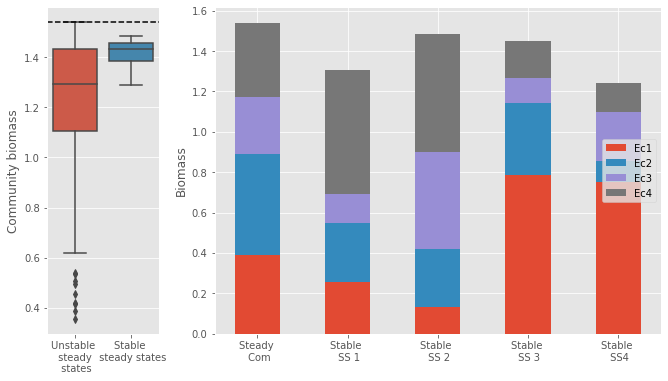

In [7]:
# Create Figure 2 (a) in the main text.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
labels = ['Steady \n Com', 'Stable \n SS 1', 'Stable \n SS 2', 'Stable \n SS 3', 'Stable \n SS4']
bm1_vals = [bm1, steady_states_bm[11][0], steady_states_bm[1][0], steady_states_bm[2][0], steady_states_bm[4][0]]
bm2_vals = [bm2, steady_states_bm[11][1], steady_states_bm[1][1], steady_states_bm[2][1], steady_states_bm[4][1]]
bm3_vals = [bm3, steady_states_bm[11][2], steady_states_bm[1][2], steady_states_bm[2][2], steady_states_bm[4][2]]
bm4_vals = [bm4, steady_states_bm[11][3], steady_states_bm[1][3], steady_states_bm[2][3], steady_states_bm[4][3]]

width = 0.50

plt.rcParams["figure.figsize"] = (11,6)
fig, ax = plt.subplots(1,2,gridspec_kw={"width_ratios": [1,4]})

graph = sns.boxplot(data = [[np.sum(unstable_steady_states[i][0]) for i in range(len(unstable_steady_states))], [np.sum(stable_steady_states[i][0]) for i in range(len(stable_steady_states))]],
                    orient='v', ax=ax[0])
graph.axhline(bm1+bm2+bm3+bm4, color = 'black', linestyle = '--')
graph.set(ylabel='Community biomass')
graph.set_xticklabels(['Unstable \n steady \n states', 'Stable \n steady states'])

ax[1].bar(labels, bm1_vals, width, label='Ec1')
ax[1].bar(labels, bm2_vals, width, label='Ec2', bottom=bm1_vals)
ax[1].bar(labels, bm3_vals, width, label='Ec3', bottom=[bm1_vals[i] + bm2_vals[i] for i in range(len(bm1_vals))])
ax[1].bar(labels, bm4_vals, width, label='Ec4', bottom=[bm1_vals[i] + bm2_vals[i] + bm3_vals[i] for i in range(len(bm1_vals))])

ax[1].set_ylabel('Biomass')
ax[1].legend(loc='center right')

plt.style.use('ggplot')
# plt.savefig('writeup_fig2_death_rate.png', bbox_inches='tight')

plt.show()



Now create Figures 2 through 4 in the SI, i.e. the FVA analysis.


In [8]:
spec1_stable_bms = [stable_steady_states[i][0][0] for i in range(len(stable_steady_states))]
spec1_unstable_bms = [unstable_steady_states[i][0][0] for i in range(len(unstable_steady_states))]

spec2_stable_bms = [stable_steady_states[i][0][1] for i in range(len(stable_steady_states))]
spec2_unstable_bms = [unstable_steady_states[i][0][1] for i in range(len(unstable_steady_states))]

spec3_stable_bms = [stable_steady_states[i][0][2] for i in range(len(stable_steady_states))]
spec3_unstable_bms = [unstable_steady_states[i][0][2] for i in range(len(unstable_steady_states))]

spec4_stable_bms = [stable_steady_states[i][0][3] for i in range(len(stable_steady_states))]
spec4_unstable_bms = [unstable_steady_states[i][0][3] for i in range(len(unstable_steady_states))]

total_stable_bms = [stable_steady_states[i][0][0] + stable_steady_states[i][0][1] + stable_steady_states[i][0][2] + stable_steady_states[i][0][3] for i in range(len(stable_steady_states))]
total_unstable_bms = [unstable_steady_states[i][0][0] + unstable_steady_states[i][0][1] + unstable_steady_states[i][0][2] + unstable_steady_states[i][0][3] for i in range(len(unstable_steady_states))]

stable_bms = [spec1_stable_bms, spec2_stable_bms, spec3_stable_bms, spec4_stable_bms]
unstable_bms = [spec1_unstable_bms, spec2_unstable_bms, spec3_unstable_bms, spec4_unstable_bms]


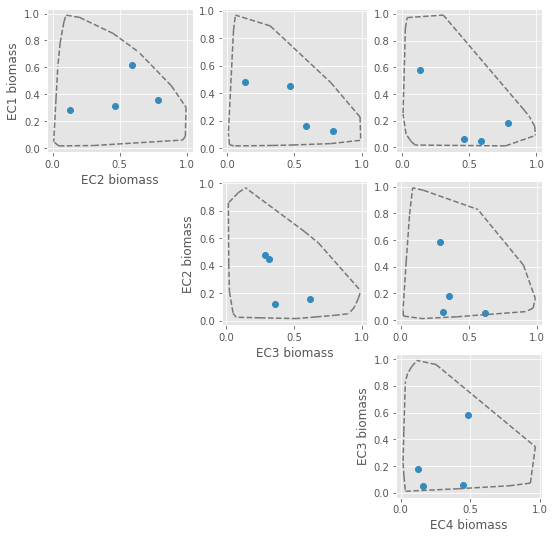

In [13]:
# Figure 2.
import scipy.spatial as spatial
fig, ax = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(12, 9)
for i in range(3):
    for j in range(4):
        if j <= i:
            fig.delaxes(ax[i][j])
        else:
            dat = np.zeros((steady_states_bm.shape[0], 2))
            dat[0:4, 0] = np.array(stable_bms[i])
            dat[0:4, 1] = np.array(stable_bms[j])
            dat[4:, 0] = np.array(unstable_bms[i])
            dat[4:, 1] = np.array(unstable_bms[j])
            hull = spatial.ConvexHull(dat)
            ax[i, j].plot(dat[0:4, 0], dat[0:4, 1], 'o', c='C1')
            if i + 1 == j:
                ax[i, j].set(xlabel=f"EC{j+1} biomass", ylabel=f"EC{i+1} biomass")
            for simplex in hull.simplices:
                ax[i, j].plot(dat[simplex, 0], dat[simplex, 1], '--', c='C3')
# fig.savefig("pareto_one_vs_one.png", bbox_inches="tight")


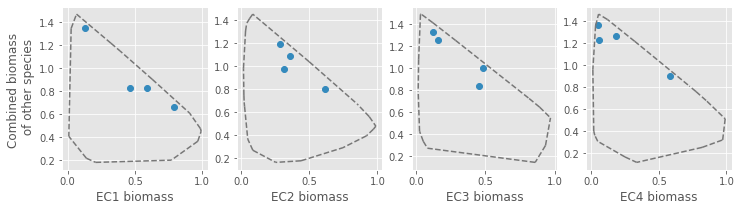

In [14]:
# Figure 3.
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(12, 3)
for i in range(4):
    if i == 0:
        ax[i].set(ylabel="Combined biomass \n of other species")
    dat = np.zeros((steady_states_bm.shape[0], 2))
    dat[0:4, 0] = np.array(stable_bms[i])
    dat[4:, 0] = np.array(unstable_bms[i])
    dat[0:4, 1] = np.zeros(len(stable_bms[i]))
    dat[4:, 1] = np.zeros(len(unstable_bms[i]))
    for j in range(4):
        if j != i:
            dat[0:4, 1] = dat[0:4, 1] + np.array(stable_bms[j])
            dat[4:, 1] = dat[4:, 1] + np.array(unstable_bms[j])
    hull = spatial.ConvexHull(dat)
    ax[i].plot(dat[0:4, 0], dat[0:4, 1], 'o', c='C1')
    ax[i].set(xlabel=f'EC{i+1} biomass')
    for simplex in hull.simplices:
        ax[i].plot(dat[simplex, 0], dat[simplex, 1], '--', c='C3')
#fig.savefig("pareto_1_vs_3.png", bbox_inches="tight")

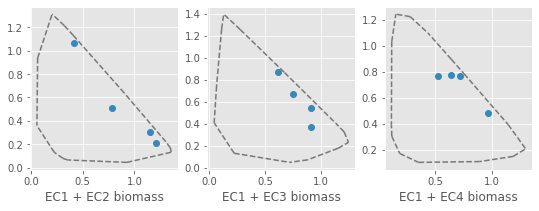

In [16]:
# Figure 4.
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9, 3)
for i in range(1, 4):
    ax[i-1].set(xlabel=f"EC1 + EC{i+1} biomass")
    dat = np.zeros((steady_states_bm.shape[0], 2))
    dat[0:4, 0] = np.array(stable_bms[0]) + np.array(stable_bms[i])
    dat[4:, 0] = np.array(unstable_bms[0]) + np.array(unstable_bms[i])
    dat[0:4, 1] = np.zeros(4)
    dat[4:, 1] = np.zeros(len(unstable_bms[0]))
    for j in range(1, 4):
        if j != i:
            dat[0:4, 1] = dat[0:4, 1] + np.array(stable_bms[j])
            dat[4:, 1] = dat[4:, 1] + np.array(unstable_bms[j])
    hull = spatial.ConvexHull(dat)
    ax[i-1].plot(dat[0:4, 0], dat[0:4, 1], 'o', c='C1')
    for simplex in hull.simplices:
        ax[i-1].plot(dat[simplex, 0], dat[simplex, 1], '--', c='C3')
# fig.savefig("pareto_2_vs_2.png", bbox_inches='tight')


Now analyze the underlying chemical reactions for the steady states.

In [22]:
exhausted_aux_mets_stable = []
exhausted_aux_mets_unstable = []
limited_ex_resources_stable = []
limited_ex_resources_unstable = []
active_lb_stable = []
active_lb_unstable = []
active_ub_stable = []
active_ub_unstable = []


In [23]:
arg_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_arg__L[u]tr')[0]
lys_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_lys__L[u]tr')[0]
met_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_met__L[u]tr')[0]
phe_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_phe__L[u]tr')[0]


In [24]:
nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]


In [25]:
np.mean(active_ub_unstable)

/home/mitch/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mitch/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [26]:
for i in range(len(stable_steady_states)):
    ss_i = stable_steady_states[i]
    biomass_ss_i = ss_i[0]
    x1_ss_i = ss_i[1]
    x2_ss_i = ss_i[2]
    x3_ss_i = ss_i[3]
    x4_ss_i = ss_i[4]

    arg_balance = x1_ss_i[arg_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[arg_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[arg_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[arg_ex_idx][0][0] * biomass_ss_i[3]
    arg_balance = int(np.abs(arg_balance) < 1e-6)
    lys_balance = x1_ss_i[lys_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[lys_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[lys_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[lys_ex_idx][0][0] * biomass_ss_i[3]
    lys_balance = int(np.abs(lys_balance) < 1e-6)
    met_balance = x1_ss_i[met_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[met_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[met_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[met_ex_idx][0][0] * biomass_ss_i[3]
    met_balance = int(np.abs(met_balance) < 1e-6)
    phe_balance = x1_ss_i[phe_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[phe_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[phe_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[phe_ex_idx][0][0] * biomass_ss_i[3]
    phe_balance = int(np.abs(phe_balance) < 1e-6)
    exhausted_aux_mets_stable.append(arg_balance + lys_balance + met_balance + phe_balance)

    nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]
    active_rhs_idx = np.where(x1_ss_i[J1:][nonzero_rhs_idx] * biomass_ss_i[0] + x2_ss_i[J2:][nonzero_rhs_idx] * biomass_ss_i[1] + x3_ss_i[J3:][nonzero_rhs_idx] * biomass_ss_i[2] + x4_ss_i[J4:][nonzero_rhs_idx] * biomass_ss_i[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
    limited_ex_resources_stable.append(len(active_rhs_idx))

    nonzero_reaction_lb_idx = np.where(reaction_lb[Ec1_reactions_idx.flatten()] != 0)[0]
    active_lb = len(np.where(x1_ss_i[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x2_ss_i[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x3_ss_i[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x4_ss_i[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb_stable.append(active_lb)

    nonzero_reaction_ub_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()] != 0)[0]
    active_ub = len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss_i[0:J1][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss_i[0:J2][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss_i[0:J3][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss_i[0:J4][nonzero_reaction_ub_idx] == 0)[0])
    active_ub_stable.append(active_ub)
    
for i in range(len(unstable_steady_states)):
    ss_i = unstable_steady_states[i]
    biomass_ss_i = ss_i[0]
    x1_ss_i = ss_i[1]
    x2_ss_i = ss_i[2]
    x3_ss_i = ss_i[3]
    x4_ss_i = ss_i[4]

    arg_balance = x1_ss_i[arg_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[arg_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[arg_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[arg_ex_idx][0][0] * biomass_ss_i[3]
    arg_balance = int(np.abs(arg_balance) < 1e-6)
    lys_balance = x1_ss_i[lys_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[lys_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[lys_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[lys_ex_idx][0][0] * biomass_ss_i[3]
    lys_balance = int(np.abs(lys_balance) < 1e-6)
    met_balance = x1_ss_i[met_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[met_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[met_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[met_ex_idx][0][0] * biomass_ss_i[3]
    met_balance = int(np.abs(met_balance) < 1e-6)
    phe_balance = x1_ss_i[phe_ex_idx][0][0] * biomass_ss_i[0] + x2_ss_i[phe_ex_idx][0][0] * biomass_ss_i[1] + x3_ss_i[phe_ex_idx][0][0] * biomass_ss_i[2] + x4_ss_i[phe_ex_idx][0][0] * biomass_ss_i[3]
    phe_balance = int(np.abs(phe_balance) < 1e-6)
    exhausted_aux_mets_unstable.append(arg_balance + lys_balance + met_balance + phe_balance)

    nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]
    active_rhs_idx = np.where(x1_ss_i[J1:][nonzero_rhs_idx] * biomass_ss_i[0] + x2_ss_i[J2:][nonzero_rhs_idx] * biomass_ss_i[1] + x3_ss_i[J3:][nonzero_rhs_idx] * biomass_ss_i[2] + x4_ss_i[J4:][nonzero_rhs_idx] * biomass_ss_i[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
    limited_ex_resources_unstable.append(len(active_rhs_idx))

    nonzero_reaction_lb_idx = np.where(reaction_lb[Ec1_reactions_idx.flatten()] != 0)[0]
    active_lb = len(np.where(x1_ss_i[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x2_ss_i[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x3_ss_i[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb = active_lb + len(np.where(x4_ss_i[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0])
    active_lb_unstable.append(active_lb)

    nonzero_reaction_ub_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()] != 0)[0]
    active_ub = len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss_i[0:J1][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss_i[0:J2][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss_i[0:J3][nonzero_reaction_ub_idx] == 0)[0])
    active_ub = active_ub + len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss_i[0:J4][nonzero_reaction_ub_idx] == 0)[0])
    active_ub_unstable.append(active_ub)
    
    




Compare stable steady states 2 and 3, and the SteadyCom solution.


In [27]:
ss2 = stable_steady_states[1]
ss3 = stable_steady_states[2]


In [28]:
biomass_ss2 = ss2[0]
x1_ss2 = ss2[1]
x2_ss2 = ss2[2]
x3_ss2 = ss2[3]
x4_ss2 = ss2[4]


In [29]:
biomass_ss3 = ss3[0]
x1_ss3 = ss3[1]
x2_ss3 = ss3[2]
x3_ss3 = ss3[3]
x4_ss3 = ss3[4]


In [30]:
biomass_steadycom = unstable_steady_states[-1][0]
x1_steadycom = unstable_steady_states[-1][1]
x2_steadycom = unstable_steady_states[-1][2]
x3_steadycom = unstable_steady_states[-1][3]
x4_steadycom = unstable_steady_states[-1][4]


In [31]:
arg_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_arg__L[u]tr')[0]
lys_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_lys__L[u]tr')[0]
met_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_met__L[u]tr')[0]
phe_ex_idx = np.where(Ec1_reaction_names == 'Ec1IEX_phe__L[u]tr')[0]


In [32]:
print('arg exchange rate, Ec1 SS 2: ', x1_ss2[arg_ex_idx][0][0])
print('arg exchange rate, Ec2 SS 2: ', x2_ss2[arg_ex_idx][0][0])
print('arg exchange rate, Ec3 SS 2: ', x3_ss2[arg_ex_idx][0][0])
print('arg exchange rate, Ec4 SS 2: ', x4_ss2[arg_ex_idx][0][0])
print('\n')
print('arg exchange rate, Ec1 SS 3: ', x1_ss3[arg_ex_idx][0][0])
print('arg exchange rate, Ec2 SS 3: ', x2_ss3[arg_ex_idx][0][0])
print('arg exchange rate, Ec3 SS 3: ', x3_ss3[arg_ex_idx][0][0])
print('arg exchange rate, Ec4 SS 3: ', x4_ss3[arg_ex_idx][0][0])
print('\n')
print('arg exchange rate, Ec1 SteadyCom: ', x1_steadycom[arg_ex_idx][0][0])
print('arg exchange rate, Ec2 SteadyCom: ', x2_steadycom[arg_ex_idx][0][0])
print('arg exchange rate, Ec3 SteadyCom: ', x3_steadycom[arg_ex_idx][0][0])
print('arg exchange rate, Ec4 SteadyCom: ', x4_steadycom[arg_ex_idx][0][0])



arg exchange rate, Ec1 SS 2:  0.04014382958369961
arg exchange rate, Ec2 SS 2:  -0.0053244
arg exchange rate, Ec3 SS 2:  -0.0053244
arg exchange rate, Ec4 SS 2:  0.0


arg exchange rate, Ec1 SS 3:  0.01651144464177019
arg exchange rate, Ec2 SS 3:  -0.005324400000000002
arg exchange rate, Ec3 SS 3:  -0.005324400000000002
arg exchange rate, Ec4 SS 3:  0.0


arg exchange rate, Ec1 SteadyCom:  0.0107122164905184
arg exchange rate, Ec2 SteadyCom:  -0.0053244
arg exchange rate, Ec3 SteadyCom:  -0.005324399999999998
arg exchange rate, Ec4 SteadyCom:  0.0


In [34]:
print('Net balance of arginine for steady state 2: ', x1_ss2[arg_ex_idx][0][0] * biomass_ss2[0] + x2_ss2[arg_ex_idx][0][0] * biomass_ss2[1] + x3_ss2[arg_ex_idx][0][0] * biomass_ss2[2] + x4_ss2[arg_ex_idx][0][0] * biomass_ss2[3])
print('Net balance of arginine for steady state 3: ', x1_ss3[arg_ex_idx][0][0] * biomass_ss3[0] + x2_ss3[arg_ex_idx][0][0] * biomass_ss3[1] + x3_ss3[arg_ex_idx][0][0] * biomass_ss3[2] + x4_ss3[arg_ex_idx][0][0] * biomass_ss3[3])
print('Net balance of arginine for SteadyCom steady state: ', x1_steadycom[arg_ex_idx][0][0] * biomass_steadycom[0] + x2_steadycom[arg_ex_idx][0][0] * biomass_steadycom[1] + x3_steadycom[arg_ex_idx][0][0] * biomass_steadycom[2] + x4_steadycom[arg_ex_idx][0][0] * biomass_steadycom[3])



Net balance of arginine for steady state 2:  0.0
Net balance of arginine for steady state 3:  -6.938893903907228e-18
Net balance of arginine for SteadyCom steady state:  1.3877787807814457e-17


In [35]:
print('phe exchange rate, Ec1 SS 2: ', x1_ss2[phe_ex_idx][0][0])
print('phe exchange rate, Ec2 SS 2: ', x2_ss2[phe_ex_idx][0][0])
print('phe exchange rate, Ec3 SS 2: ', x3_ss2[phe_ex_idx][0][0])
print('phe exchange rate, Ec4 SS 2: ', x4_ss2[phe_ex_idx][0][0])
print('\n')
print('phe exchange rate, Ec1 SS 3: ', x1_ss3[phe_ex_idx][0][0])
print('phe exchange rate, Ec2 SS 3: ', x2_ss3[phe_ex_idx][0][0])
print('phe exchange rate, Ec3 SS 3: ', x3_ss3[phe_ex_idx][0][0])
print('phe exchange rate, Ec4 SS 3: ', x4_ss3[phe_ex_idx][0][0])
print('\n')
print('phe exchange rate, Ec1 SteadyCom: ', x1_steadycom[phe_ex_idx][0][0])
print('phe exchange rate, Ec2 SteadyCom: ', x2_steadycom[phe_ex_idx][0][0])
print('phe exchange rate, Ec3 SteadyCom: ', x3_steadycom[phe_ex_idx][0][0])
print('phe exchange rate, Ec4 SteadyCom: ', x4_steadycom[phe_ex_idx][0][0])


phe exchange rate, Ec1 SS 2:  0.0
phe exchange rate, Ec2 SS 2:  -0.0031661999999999997
phe exchange rate, Ec3 SS 2:  -0.0031662
phe exchange rate, Ec4 SS 2:  0.033391294076870186


phe exchange rate, Ec1 SS 3:  0.0
phe exchange rate, Ec2 SS 3:  -0.0031662
phe exchange rate, Ec3 SS 3:  -0.0031662
phe exchange rate, Ec4 SS 3:  0.003072903612331082


phe exchange rate, Ec1 SteadyCom:  0.0
phe exchange rate, Ec2 SteadyCom:  -0.0031661999999999997
phe exchange rate, Ec3 SteadyCom:  -0.0031661999999999992
phe exchange rate, Ec4 SteadyCom:  0.006805408121157832


In [36]:
print('Net balance of phe for steady state 2: ', x1_ss2[phe_ex_idx][0][0] * biomass_ss2[0] + x2_ss2[phe_ex_idx][0][0] * biomass_ss2[1] + x3_ss2[phe_ex_idx][0][0] * biomass_ss2[2] + x4_ss2[phe_ex_idx][0][0] * biomass_ss2[3])
print('Net balance of phe for steady state 3: ', x1_ss3[phe_ex_idx][0][0] * biomass_ss3[0] + x2_ss3[phe_ex_idx][0][0] * biomass_ss3[1] + x3_ss3[phe_ex_idx][0][0] * biomass_ss3[2] + x4_ss3[phe_ex_idx][0][0] * biomass_ss3[3])
print('Net balance of phe for SteadyCom steady state: ', x1_steadycom[phe_ex_idx][0][0] * biomass_steadycom[0] + x2_steadycom[phe_ex_idx][0][0] * biomass_steadycom[1] + x3_steadycom[phe_ex_idx][0][0] * biomass_steadycom[2] + x4_steadycom[phe_ex_idx][0][0] * biomass_steadycom[3])


Net balance of phe for steady state 2:  0.0
Net balance of phe for steady state 3:  0.0
Net balance of phe for SteadyCom steady state:  0.0


In [37]:
print('met exchange rate, Ec1 SS 4: ', x1_ss2[met_ex_idx][0][0])
print('met exchange rate, Ec2 SS 4: ', x2_ss2[met_ex_idx][0][0])
print('met exchange rate, Ec3 SS 4: ', x3_ss2[met_ex_idx][0][0])
print('met exchange rate, Ec4 SS 4: ', x4_ss2[met_ex_idx][0][0])
print('\n')
print('met exchange rate, Ec1 SS 5: ', x1_ss3[met_ex_idx][0][0])
print('met exchange rate, Ec2 SS 5: ', x2_ss3[met_ex_idx][0][0])
print('met exchange rate, Ec3 SS 5: ', x3_ss3[met_ex_idx][0][0])
print('met exchange rate, Ec4 SS 5: ', x4_ss3[met_ex_idx][0][0])
print('\n')
print('met exchange rate, Ec1 SteadyCom: ', x1_steadycom[met_ex_idx][0][0])
print('met exchange rate, Ec2 SteadyCom: ', x2_steadycom[met_ex_idx][0][0])
print('met exchange rate, Ec3 SteadyCom: ', x3_steadycom[met_ex_idx][0][0])
print('met exchange rate, Ec4 SteadyCom: ', x4_steadycom[met_ex_idx][0][0])


met exchange rate, Ec1 SS 4:  -0.0027706139999999994
met exchange rate, Ec2 SS 4:  0.0
met exchange rate, Ec3 SS 4:  0.0011718368970799404
met exchange rate, Ec4 SS 4:  -0.002770614


met exchange rate, Ec1 SS 5:  -0.002770613999999998
met exchange rate, Ec2 SS 5:  0.0
met exchange rate, Ec3 SS 5:  0.009740457504468149
met exchange rate, Ec4 SS 5:  -0.002770613999999999


met exchange rate, Ec1 SteadyCom:  -0.002770614
met exchange rate, Ec2 SteadyCom:  0.0
met exchange rate, Ec3 SteadyCom:  0.007343889438758041
met exchange rate, Ec4 SteadyCom:  -0.002770613999999999


In [38]:
print('Net balance of met for steady state 2: ', x1_ss2[met_ex_idx][0][0] * biomass_ss2[0] + x2_ss2[met_ex_idx][0][0] * biomass_ss2[1] + x3_ss2[met_ex_idx][0][0] * biomass_ss2[2] + x4_ss2[met_ex_idx][0][0] * biomass_ss2[3])
print('Net balance of met for steady state 3: ', x1_ss3[met_ex_idx][0][0] * biomass_ss3[0] + x2_ss3[met_ex_idx][0][0] * biomass_ss3[1] + x3_ss3[met_ex_idx][0][0] * biomass_ss3[2] + x4_ss3[met_ex_idx][0][0] * biomass_ss3[3])
print('Net balance of met for SteadyCom steady state: ', x1_steadycom[met_ex_idx][0][0] * biomass_steadycom[0] + x2_steadycom[met_ex_idx][0][0] * biomass_steadycom[1] + x3_steadycom[met_ex_idx][0][0] * biomass_steadycom[2] + x4_steadycom[met_ex_idx][0][0] * biomass_steadycom[3])


Net balance of met for steady state 2:  -8.673617379884035e-19
Net balance of met for steady state 3:  2.0816681711721685e-17
Net balance of met for SteadyCom steady state:  0.0


In [39]:
print('lys exchange rate, Ec1 SS 4: ', x1_ss2[lys_ex_idx][0][0])
print('lys exchange rate, Ec2 SS 4: ', x2_ss2[lys_ex_idx][0][0])
print('lys exchange rate, Ec3 SS 4: ', x3_ss2[lys_ex_idx][0][0])
print('lys exchange rate, Ec4 SS 4: ', x4_ss2[lys_ex_idx][0][0])
print('\n')
print('lys exchange rate, Ec1 SS 5: ', x1_ss3[lys_ex_idx][0][0])
print('lys exchange rate, Ec2 SS 5: ', x2_ss3[lys_ex_idx][0][0])
print('lys exchange rate, Ec3 SS 5: ', x3_ss3[lys_ex_idx][0][0])
print('lys exchange rate, Ec4 SS 5: ', x4_ss3[lys_ex_idx][0][0])
print('\n')
print('lys exchange rate, Ec1 SteadyCom: ', x1_steadycom[lys_ex_idx][0][0])
print('lys exchange rate, Ec2 SteadyCom: ', x2_steadycom[lys_ex_idx][0][0])
print('lys exchange rate, Ec3 SteadyCom: ', x3_steadycom[lys_ex_idx][0][0])
print('lys exchange rate, Ec4 SteadyCom: ', x4_steadycom[lys_ex_idx][0][0])


lys exchange rate, Ec1 SS 4:  -0.0061776
lys exchange rate, Ec2 SS 4:  0.0030399253503803946
lys exchange rate, Ec3 SS 4:  0.0
lys exchange rate, Ec4 SS 4:  -0.0061776


lys exchange rate, Ec1 SS 5:  -0.006177599999999997
lys exchange rate, Ec2 SS 5:  0.013584660211021305
lys exchange rate, Ec3 SS 5:  0.0
lys exchange rate, Ec4 SS 5:  -0.006177599999999998


lys exchange rate, Ec1 SteadyCom:  -0.006177599999999999
lys exchange rate, Ec2 SteadyCom:  0.009332815993736754
lys exchange rate, Ec3 SteadyCom:  0.0
lys exchange rate, Ec4 SteadyCom:  -0.006177599999999999


In [40]:
print('Net balance of lys for steady state 2: ', x1_ss2[lys_ex_idx][0][0] * biomass_ss2[0] + x2_ss2[lys_ex_idx][0][0] * biomass_ss2[1] + x3_ss2[lys_ex_idx][0][0] * biomass_ss2[2] + x4_ss2[lys_ex_idx][0][0] * biomass_ss2[3])
print('Net balance of lys for steady state 3: ', x1_ss3[lys_ex_idx][0][0] * biomass_ss3[0] + x2_ss3[lys_ex_idx][0][0] * biomass_ss3[1] + x3_ss3[lys_ex_idx][0][0] * biomass_ss3[2] + x4_ss3[lys_ex_idx][0][0] * biomass_ss3[3])
print('Net balance of lys for SteadyCom steady state: ', x1_steadycom[lys_ex_idx][0][0] * biomass_steadycom[0] + x2_steadycom[lys_ex_idx][0][0] * biomass_steadycom[1] + x3_steadycom[lys_ex_idx][0][0] * biomass_steadycom[2] + x4_steadycom[lys_ex_idx][0][0] * biomass_steadycom[3])


Net balance of lys for steady state 2:  -1.734723475976807e-18
Net balance of lys for steady state 3:  2.7755575615628914e-17
Net balance of lys for SteadyCom steady state:  0.0


In [41]:
nonzero_rhs_idx = np.where(reaction_lb[lumen_reactions_idx.flatten()] != 0)[0]


In [42]:
print('Number of active right-hand side constraints, steady state 2: ', len(np.where(x1_ss2[J1:][nonzero_rhs_idx] * biomass_ss2[0] + x2_ss2[J2:][nonzero_rhs_idx] * biomass_ss2[1] + x3_ss2[J3:][nonzero_rhs_idx] * biomass_ss2[2] + x4_ss2[J4:][nonzero_rhs_idx] * biomass_ss2[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]))
print('Number of active right-hand side constraints, steady state 3: ', len(np.where(x1_ss3[J1:][nonzero_rhs_idx] * biomass_ss3[0] + x2_ss3[J2:][nonzero_rhs_idx] * biomass_ss3[1] + x3_ss3[J3:][nonzero_rhs_idx] * biomass_ss3[2] + x4_ss3[J4:][nonzero_rhs_idx] * biomass_ss3[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]))
print('Number of active right-hand side constraints, SteadyCom steady state: ', len(np.where(x1_steadycom[J1:][nonzero_rhs_idx] * biomass_steadycom[0] + x2_steadycom[J2:][nonzero_rhs_idx] * biomass_steadycom[1] + x3_steadycom[J3:][nonzero_rhs_idx] * biomass_steadycom[2] + x4_steadycom[J4:][nonzero_rhs_idx] * biomass_steadycom[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]))



Number of active right-hand side constraints, steady state 2:  2
Number of active right-hand side constraints, steady state 3:  1
Number of active right-hand side constraints, SteadyCom steady state:  1


In [43]:
active_rhs_ss2_idx = np.where(x1_ss2[J1:][nonzero_rhs_idx] * biomass_ss2[0] + x2_ss2[J2:][nonzero_rhs_idx] * biomass_ss2[1] + x3_ss2[J3:][nonzero_rhs_idx] * biomass_ss2[2] + x4_ss2[J4:][nonzero_rhs_idx] * biomass_ss2[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
active_rhs_ss3_idx = np.where(x1_ss3[J1:][nonzero_rhs_idx] * biomass_ss3[0] + x2_ss3[J2:][nonzero_rhs_idx] * biomass_ss3[1] + x3_ss3[J3:][nonzero_rhs_idx] * biomass_ss3[2] + x4_ss3[J4:][nonzero_rhs_idx] * biomass_ss3[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
active_rhs_steadycom_idx = np.where(x1_steadycom[J1:][nonzero_rhs_idx] * biomass_steadycom[0] + x2_steadycom[J2:][nonzero_rhs_idx] * biomass_steadycom[1] + x3_steadycom[J3:][nonzero_rhs_idx] * biomass_steadycom[2] + x4_steadycom[J4:][nonzero_rhs_idx] * biomass_steadycom[3] - reaction_lb[lumen_reactions_idx.flatten()][nonzero_rhs_idx] <= 1e-6)[0]
if len(active_rhs_ss2_idx) > 0:
    print('Active met exchange constraint, steady state 2: ', lumen_reaction_names[nonzero_rhs_idx][active_rhs_ss2_idx][0])
if len(active_rhs_ss3_idx) > 0:
    print('Active met exchange constraint, steady state 3: ', lumen_reaction_names[nonzero_rhs_idx][active_rhs_ss3_idx][0])
if len(active_rhs_steadycom_idx) > 0:
    print('Active met exchange constraint, steadycom: ', lumen_reaction_names[nonzero_rhs_idx][active_rhs_steadycom_idx][0])

    

Active met exchange constraint, steady state 2:  ['EX_glc__D[u]']
Active met exchange constraint, steady state 3:  ['EX_glc__D[u]']
Active met exchange constraint, steadycom:  ['EX_glc__D[u]']


In [44]:
nonzero_reaction_lb_idx = np.where(reaction_lb[Ec1_reactions_idx.flatten()] != 0)[0]
nonzero_reaction_ub_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()] != 0)[0]


In [45]:
print('Number of active reaction lb constraints, steady state 2 Ec1: ', len(np.where(x1_ss2[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 2 Ec2: ', len(np.where(x2_ss2[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 2 Ec3: ', len(np.where(x3_ss2[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 2 Ec4: ', len(np.where(x4_ss2[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('\n')
print('Number of active reaction lb constraints, steady state 3 Ec1: ', len(np.where(x1_ss3[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 3 Ec2: ', len(np.where(x2_ss3[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 3 Ec3: ', len(np.where(x3_ss3[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, steady state 3 Ec4: ', len(np.where(x4_ss3[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('\n')
print('Number of active reaction lb constraints, SteadyCom steady state Ec1: ', len(np.where(x1_steadycom[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, SteadyCom steady state Ec2: ', len(np.where(x2_steadycom[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, SteadyCom steady state Ec3: ', len(np.where(x3_steadycom[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))
print('Number of active reaction lb constraints, SteadyCom steady state Ec4: ', len(np.where(x4_steadycom[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]))



Number of active reaction lb constraints, steady state 2 Ec1:  13
Number of active reaction lb constraints, steady state 2 Ec2:  12
Number of active reaction lb constraints, steady state 2 Ec3:  13
Number of active reaction lb constraints, steady state 2 Ec4:  12


Number of active reaction lb constraints, steady state 3 Ec1:  12
Number of active reaction lb constraints, steady state 3 Ec2:  11
Number of active reaction lb constraints, steady state 3 Ec3:  13
Number of active reaction lb constraints, steady state 3 Ec4:  12


Number of active reaction lb constraints, SteadyCom steady state Ec1:  0
Number of active reaction lb constraints, SteadyCom steady state Ec2:  2
Number of active reaction lb constraints, SteadyCom steady state Ec3:  2
Number of active reaction lb constraints, SteadyCom steady state Ec4:  0


In [46]:
active_lb_ss2_Ec1_idx = np.where(x1_ss2[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss2_Ec2_idx = np.where(x2_ss2[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss2_Ec3_idx = np.where(x3_ss2[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss2_Ec4_idx = np.where(x4_ss2[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]

print('Active reaction lb constraints, steady state 2 Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_lb_idx][active_lb_ss2_Ec1_idx])
print('Active reaction lb constraints, steady state 2 Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_lb_idx][active_lb_ss2_Ec2_idx])
print('Active reaction lb constraints, steady state 2 Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_lb_idx][active_lb_ss2_Ec3_idx])
print('Active reaction lb constraints, steady state 2 Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_lb_idx][active_lb_ss2_Ec4_idx])
print('\n')

active_lb_ss3_Ec1_idx = np.where(x1_ss3[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss3_Ec2_idx = np.where(x2_ss3[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss3_Ec3_idx = np.where(x3_ss3[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_ss3_Ec4_idx = np.where(x4_ss3[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]

print('Active reaction lb constraints, steady state 3 Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_lb_idx][active_lb_ss3_Ec1_idx])
print('Active reaction lb constraints, steady state 3 Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_lb_idx][active_lb_ss3_Ec2_idx])
print('Active reaction lb constraints, steady state 3 Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_lb_idx][active_lb_ss3_Ec3_idx])
print('Active reaction lb constraints, steady state 3 Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_lb_idx][active_lb_ss3_Ec4_idx])
print('\n')

active_lb_steadycom_Ec1_idx = np.where(x1_steadycom[0:J1][nonzero_reaction_lb_idx] - reaction_lb[Ec1_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_steadycom_Ec2_idx = np.where(x2_steadycom[0:J2][nonzero_reaction_lb_idx] - reaction_lb[Ec2_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_steadycom_Ec3_idx = np.where(x3_steadycom[0:J3][nonzero_reaction_lb_idx] - reaction_lb[Ec3_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]
active_lb_steadycom_Ec4_idx = np.where(x4_steadycom[0:J4][nonzero_reaction_lb_idx] - reaction_lb[Ec4_reactions_idx.flatten()][nonzero_reaction_lb_idx] == 0)[0]

print('Active reaction lb constraints, SteadyCom steady state Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_lb_idx][active_lb_steadycom_Ec1_idx])
print('Active reaction lb constraints, SteadyCom steady state Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_lb_idx][active_lb_steadycom_Ec2_idx])
print('Active reaction lb constraints, SteadyCom steady state Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_lb_idx][active_lb_steadycom_Ec3_idx])
print('Active reaction lb constraints, SteadyCom steady state Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_lb_idx][active_lb_steadycom_Ec4_idx])
print('\n')


Active reaction lb constraints, steady state 2 Ec1:  [['Ec1ADK3']
 ['Ec1ADNt2pp_copy2']
 ['Ec1ALATA_L']
 ['Ec1CAt6pp']
 ['Ec1CYTDt2pp_copy2']
 ['Ec1ICHORS_copy1']
 ['Ec1HPYRI']
 ['Ec1PPK']
 ['Ec1PPM']
 ['Ec1THRt2rpp']
 ['Ec1SUCOAS']
 ['Ec1TRSARr']
 ['Ec1URIt2pp_copy2']]
Active reaction lb constraints, steady state 2 Ec2:  [['Ec2ACt2rpp']
 ['Ec2ALATA_L']
 ['Ec2ARGSL']
 ['Ec2CAt6pp']
 ['Ec2CYTDt2pp_copy2']
 ['Ec2ICHORS_copy1']
 ['Ec2HPYRI']
 ['Ec2INSt2pp_copy2']
 ['Ec2THMDt2pp_copy2']
 ['Ec2SUCOAS']
 ['Ec2TRSARr']
 ['Ec2IEX_met__L[u]tr']]
Active reaction lb constraints, steady state 2 Ec3:  [['Ec3ACt2rpp']
 ['Ec3ADK3']
 ['Ec3ALATA_L']
 ['Ec3ARGSL']
 ['Ec3CAt6pp']
 ['Ec3CRNt2rpp']
 ['Ec3CYTDt2pp_copy2']
 ['Ec3ICHORS_copy1']
 ['Ec3HPYRI']
 ['Ec3INSt2pp_copy2']
 ['Ec3TRSARr']
 ['Ec3URIt2pp_copy2']
 ['Ec3IEX_lys__L[u]tr']]
Active reaction lb constraints, steady state 2 Ec4:  [['Ec4ACKr']
 ['Ec4ALATA_L']
 ['Ec4CAt6pp']
 ['Ec4CRNt2rpp']
 ['Ec4CYTDt2pp_copy2']
 ['Ec4ICHORS_copy1']
 ['Ec4HPYRI']

In [48]:
print('Number of active reaction ub constraints, steady state 2 Ec1: ', len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss2[0:J1][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 2 Ec2: ', len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss2[0:J2][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 2 Ec3: ', len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss2[0:J3][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 2 Ec4: ', len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss2[0:J4][nonzero_reaction_ub_idx] == 0)[0]))
print('\n')
print('Number of active reaction ub constraints, steady state 3 Ec1: ', len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss3[0:J1][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 3 Ec2: ', len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss3[0:J2][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 3 Ec3: ', len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss3[0:J3][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, steady state 3 Ec4: ', len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss3[0:J4][nonzero_reaction_ub_idx] == 0)[0]))
print('\n')
print('Number of active reaction ub constraints, SteadyCom steady state Ec1: ', len(np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_steadycom[0:J1][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, SteadyCom steady state Ec2: ', len(np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_steadycom[0:J2][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, SteadyCom steady state Ec3: ', len(np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_steadycom[0:J3][nonzero_reaction_ub_idx] == 0)[0]))
print('Number of active reaction ub constraints, SteadyCom steady state Ec4: ', len(np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_steadycom[0:J4][nonzero_reaction_ub_idx] == 0)[0]))





Number of active reaction ub constraints, steady state 2 Ec1:  11
Number of active reaction ub constraints, steady state 2 Ec2:  13
Number of active reaction ub constraints, steady state 2 Ec3:  18
Number of active reaction ub constraints, steady state 2 Ec4:  20


Number of active reaction ub constraints, steady state 3 Ec1:  13
Number of active reaction ub constraints, steady state 3 Ec2:  13
Number of active reaction ub constraints, steady state 3 Ec3:  17
Number of active reaction ub constraints, steady state 3 Ec4:  15


Number of active reaction ub constraints, SteadyCom steady state Ec1:  0
Number of active reaction ub constraints, SteadyCom steady state Ec2:  3
Number of active reaction ub constraints, SteadyCom steady state Ec3:  3
Number of active reaction ub constraints, SteadyCom steady state Ec4:  1


In [49]:
active_ub_steadycom_Ec2_idx

NameError: name 'active_ub_steadycom_Ec2_idx' is not defined

In [ ]:
active_lb_steadycom_Ec2_idx

In [ ]:
active_rhs_steadycom_idx

In [ ]:
yada = S[:, Ec2_reactions_idx.flatten()]
print(np.where(yada[:,320].toarray() != 0))
print(np.where(yada[2406,:].toarray() != 0))

In [50]:
active_ub_ss2_Ec1_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss2[0:J1][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss2_Ec2_idx = np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss2[0:J2][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss2_Ec3_idx = np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss2[0:J3][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss2_Ec4_idx = np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss2[0:J4][nonzero_reaction_ub_idx] == 0)[0]

print('Active reaction ub constraints, steady state 2 Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_ub_idx][active_ub_ss2_Ec1_idx])
print('Active reaction ub constraints, steady state 2 Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_ub_idx][active_ub_ss2_Ec2_idx])
print('Active reaction ub constraints, steady state 2 Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_ub_idx][active_ub_ss2_Ec3_idx])
print('Active reaction ub constraints, steady state 2 Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_ub_idx][active_ub_ss2_Ec4_idx])
print('\n')

active_ub_ss3_Ec1_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_ss3[0:J1][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss3_Ec2_idx = np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_ss3[0:J2][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss3_Ec3_idx = np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_ss3[0:J3][nonzero_reaction_ub_idx] == 0)[0]
active_ub_ss3_Ec4_idx = np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_ss3[0:J4][nonzero_reaction_ub_idx] == 0)[0]

print('Active reaction ub constraints, steady state 3 Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_ub_idx][active_ub_ss3_Ec1_idx])
print('Active reaction ub constraints, steady state 3 Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_ub_idx][active_ub_ss3_Ec2_idx])
print('Active reaction ub constraints, steady state 3 Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_ub_idx][active_ub_ss3_Ec3_idx])
print('Active reaction ub constraints, steady state 3 Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_ub_idx][active_ub_ss3_Ec4_idx])
print('\n')

active_ub_steadycom_Ec1_idx = np.where(reaction_ub[Ec1_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x1_steadycom[0:J1][nonzero_reaction_ub_idx] == 0)[0]
active_ub_steadycom_Ec2_idx = np.where(reaction_ub[Ec2_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x2_steadycom[0:J2][nonzero_reaction_ub_idx] == 0)[0]
active_ub_steadycom_Ec3_idx = np.where(reaction_ub[Ec3_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x3_steadycom[0:J3][nonzero_reaction_ub_idx] == 0)[0]
active_ub_steadycom_Ec4_idx = np.where(reaction_ub[Ec4_reactions_idx.flatten()][nonzero_reaction_ub_idx] - x4_steadycom[0:J4][nonzero_reaction_ub_idx] == 0)[0]

print('Active reaction ub constraints, SteadyCom steady state Ec1: ', Ec1_reaction_names[0:J1][nonzero_reaction_ub_idx][active_ub_steadycom_Ec1_idx])
print('Active reaction ub constraints, SteadyCom steady state Ec2: ', Ec2_reaction_names[0:J2][nonzero_reaction_ub_idx][active_ub_steadycom_Ec2_idx])
print('Active reaction ub constraints, SteadyCom steady state Ec3: ', Ec3_reaction_names[0:J3][nonzero_reaction_ub_idx][active_ub_steadycom_Ec3_idx])
print('Active reaction ub constraints, SteadyCom steady state Ec4: ', Ec4_reaction_names[0:J4][nonzero_reaction_ub_idx][active_ub_steadycom_Ec4_idx])
print('\n')



Active reaction ub constraints, steady state 2 Ec1:  [['Ec1ACACT1r']
 ['Ec1ACCOAL']
 ['Ec1ADNt2pp_copy1']
 ['Ec1CYTDt2pp_copy1']
 ['Ec1ICHORS_copy2']
 ['Ec1HPYRRx']
 ['Ec1KAT1']
 ['Ec1R15BPK']
 ['Ec1R1PK']
 ['Ec1THRt4pp']
 ['Ec1URIt2pp_copy1']]
Active reaction ub constraints, steady state 2 Ec2:  [['Ec2ACACT1r']
 ['Ec2ACCOAL']
 ['Ec2ADK1']
 ['Ec2ARGSL']
 ['Ec2CYTDt2pp_copy1']
 ['Ec2ICHORS_copy2']
 ['Ec2HPYRRx']
 ['Ec2INSt2pp_copy1']
 ['Ec2KAT1']
 ['Ec2PPCSCT']
 ['Ec2PPNDH']
 ['Ec2THMDt2pp_copy1']
 ['Ec2METt3pp']]
Active reaction ub constraints, steady state 2 Ec3:  [['Ec3ACACT1r']
 ['Ec3ACCOAL']
 ['Ec3ACt4pp']
 ['Ec3ADK1']
 ['Ec3ARGSL']
 ['Ec3CRNDt2rpp']
 ['Ec3CRNt8pp']
 ['Ec3CYTDt2pp_copy1']
 ['Ec3GLDBRAN2']
 ['Ec3GLBRAN2']
 ['Ec3ICHORS_copy2']
 ['Ec3HPYRRx']
 ['Ec3INSt2pp_copy1']
 ['Ec3KAT1']
 ['Ec3LYSt3pp']
 ['Ec3PPCSCT']
 ['Ec3PPNDH']
 ['Ec3URIt2pp_copy1']]
Active reaction ub constraints, steady state 2 Ec4:  [['Ec4ACACT1r']
 ['Ec4ACCOAL']
 ['Ec4ACS']
 ['Ec4ARGt3pp']
 ['Ec4CRNDt2rp